In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
hr_data = pd.read_csv('datafiles/HR_dataset.csv')
hr_data.columns=(['name', 'emp_num', 'state', 'zip', 'DOB', 'age', 'sex', 'marital_desc', 'citizen_desc', 'hispanic', 'race', 'date_of_hire', 'date_of_term', 'reason_for_term', 'emp_status', 'department', 'position', 'pay_rate', 'manager_name', 'employee_source', 'performance_score'])
hr_data['sex'].replace('male','Male', inplace = True)
hr_data = hr_data[pd.notnull(hr_data['name'])]
hr_data = hr_data.fillna(0)
hr_data.shape

(301, 21)

In [3]:
gle = LabelEncoder()
employee_labels = gle.fit_transform(hr_data['emp_status'])
current_employee = {index: label for index, label in
                  enumerate(gle.classes_)}

[Text(0, 0, 'Fully Meets'),
 Text(1, 0, 'N/A- too early to review'),
 Text(2, 0, '90-day meets'),
 Text(3, 0, 'Exceptional'),
 Text(4, 0, 'Needs Improvement'),
 Text(5, 0, 'Exceeds'),
 Text(6, 0, 'PIP')]

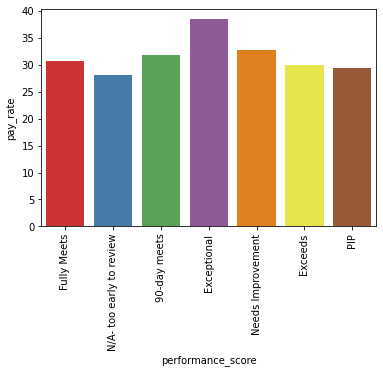

In [4]:
performance_chart = sns.barplot(x = 'performance_score', y = 'pay_rate', data=hr_data, palette='Set1', ci=None)
performance_chart.set_xticklabels(performance_chart.get_xticklabels(),rotation=90)

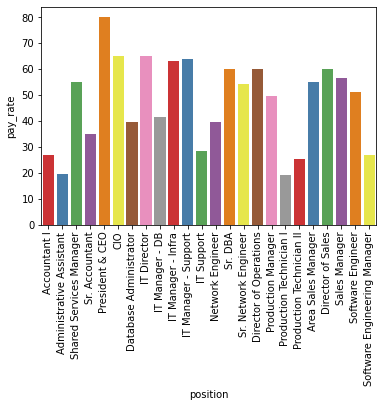

In [5]:
position_chart = sns.barplot(x = 'position', y = 'pay_rate', data=hr_data, palette='Set1', ci = None)
position_chart.set_xticklabels(position_chart.get_xticklabels(),rotation=90)
plt.show()

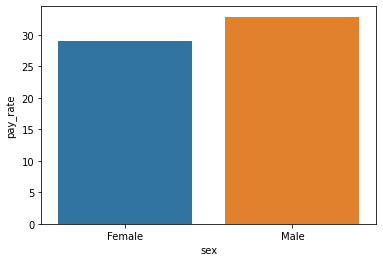

In [7]:
ax = sns.barplot(x = 'sex', y = 'pay_rate', data=hr_data, ci=None )
fig = ax.get_figure()
fig.savefig("images/male_pay.png")

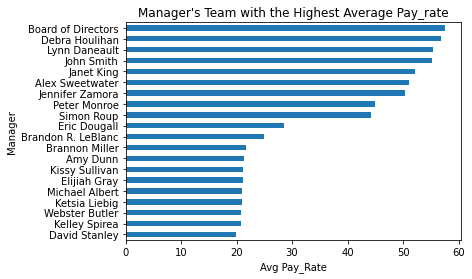

In [9]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['manager_name'])['pay_rate'].mean()
df = df.sort_values(axis=0)

xlabel = 'Avg Pay_Rate'
ylabel = 'Manager'
title= "Manager's Team with the Highest Average Pay_rate"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

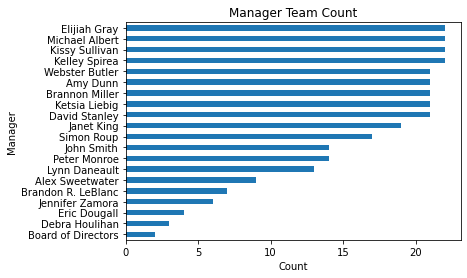

In [10]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['manager_name'])['pay_rate'].count()
df = df.sort_values(axis=0)

xlabel = 'Count'
ylabel = 'Manager'
title= "Manager Team Count"

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

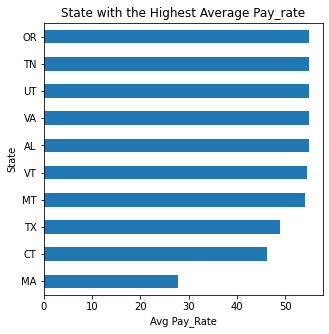

In [11]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['state'])['pay_rate'].mean()
df = df.sort_values(axis=0)
df = df.head(10)

xlabel = 'Avg Pay_Rate'
ylabel = 'State'
title= "State with the Highest Average Pay_rate"
fig = plt.figure(figsize=(5,5))

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

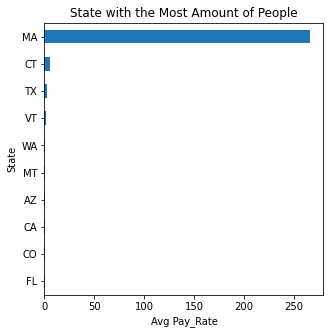

In [12]:
df = hr_data.replace(np.nan,0)
df = hr_data.groupby(['state'])['pay_rate'].count()
df = df.sort_values(axis=0)
df = df.tail(10)

xlabel = 'Avg Pay_Rate'
ylabel = 'State'
title= "State with the Most Amount of People"
fig = plt.figure(figsize=(5,5))

ax = df.plot.barh(stacked = True)
ax.set(title = title, xlabel=xlabel, ylabel=ylabel)
plt.show()

# Dummy Variables
**we want to create dummy variables for sex and positions**
- we drop the first column
    - sex_female was dropped
    - position Accountant 1 was dropped
    - '90-day meets' performance score was dropped
    - 'Alex Sweetwater'manager was dropped


In [13]:
performance_labels = gle.fit_transform(hr_data['performance_score'])
performances = {index: label for index, label in
                  enumerate(gle.classes_)}

managers_labels = gle.fit_transform(hr_data['manager_name'])
managers = {index: label for index, label in
                  enumerate(gle.classes_)}

In [14]:
hr_data = pd.get_dummies(hr_data, columns = ['sex','manager_name', 'position'], drop_first=True)
hr_data = hr_data.drop(columns='emp_num')
#abs(hr_data.corr())>0.75

<AxesSubplot:>

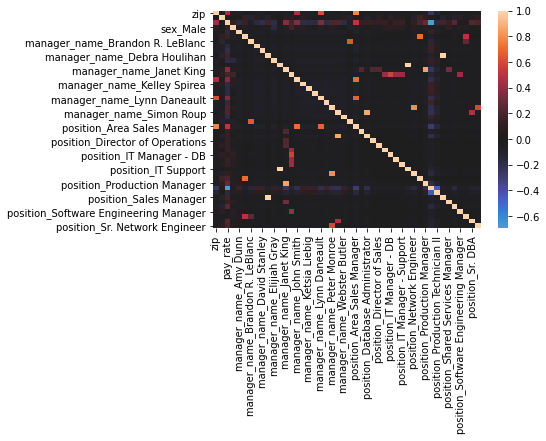

In [15]:
sns.heatmap(hr_data.corr(), center=0)

In [20]:
# feats = ['manager_name_Amy Dunn','performance_score_Exceeds', 'performance_score_Exceptional','performance_score_Fully Meets','performance_score_N/A- too early to review','performance_score_Needs Improvement', 'performance_score_PIP']
# corr = hr_data[feats].corr()
# descr = hr_data[feats].describe()
# descr

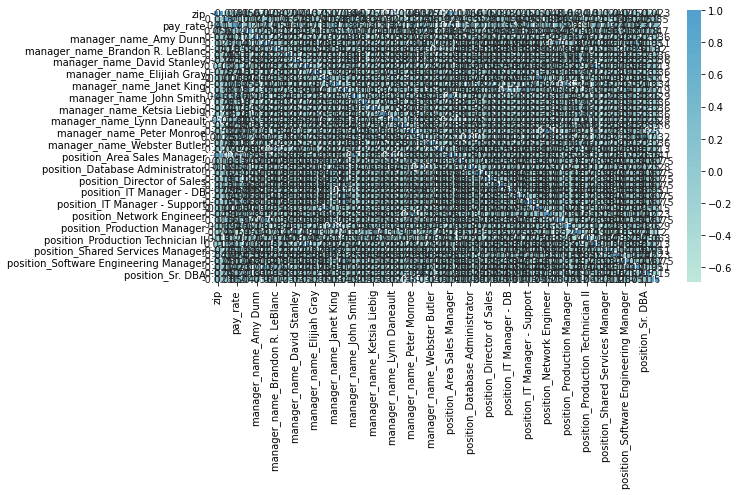

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(hr_data.corr(), center=5, annot=True, linewidths=.5, ax=ax)

In [23]:
#Removing columns
hr_data = hr_data.drop(columns=['DOB','date_of_term','zip'])

#Dummy Variables
hr_data = pd.get_dummies(hr_data, columns = ['state', 'marital_desc', 'race', 'performance_score'], drop_first=True)
# dropping AL as the first | devorced columns | Native American column

In [24]:
#Formatting Columns
hr_data['hispanic'].replace('yes','1', inplace = True)
hr_data['hispanic'].replace('no','0', inplace = True)
hr_data['hispanic'].replace('Yes','1', inplace = True)
hr_data['hispanic'].replace('No','0', inplace = True)
hr_data['citizen_desc'].replace('US Citizen','1', inplace = True)
hr_data['citizen_desc'].replace('Non-Citizen','0', inplace = True)
hr_data['citizen_desc'].replace('Eligible NonCitizen','0', inplace = True)
hr_data['date_of_hire']=pd.to_datetime(hr_data['date_of_hire'])
hr_data['month_of_hire'] = hr_data['date_of_hire'].dt.month
hr_data['year_of_hire'] = hr_data['date_of_hire'].dt.year
hr_data = hr_data.drop(columns=['date_of_hire'])
hr_data['reason_for_term'].value_counts()

N/A - still employed                188
Another position                     20
unhappy                              14
more money                           11
N/A - Has not started yet            11
hours                                 9
career change                         9
attendance                            7
return to school                      5
relocation out of area                5
military                              4
retiring                              4
performance                           4
medical issues                        3
no-call, no-show                      3
maternity leave - did not return      3
gross misconduct                      1
Name: reason_for_term, dtype: int64

In [25]:
hr_data = hr_data.drop(columns=['reason_for_term'])
#Another position was dropped
hr_data = pd.get_dummies(hr_data, columns = ['emp_status'], drop_first=True) #dropped Active
hr_data = hr_data.drop(300)
hr_data = pd.get_dummies(hr_data, columns = ['department'], drop_first=True) #dropped Admin Offices
hr_data = hr_data.drop(columns=['employee_source'])
hr_data.to_csv('hrdata_cleaned')